<a href="https://colab.research.google.com/github/ayshaasif/MachineLearning/blob/main/weatherprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('weatherprediction')
jovian.set_colab_id('11NyrIEHsxmfzYF9wjyHDQ9HfDWhDLH0B')

     |████████████████████████████████| 68 kB 4.0 MB/s 


# weatherprediction

Use the "Run" button to execute the code.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install jovian --upgrade --quiet

In [6]:
import jovian

In [7]:
# Execute this to save new versions of the notebook
jovian.commit(project="weatherprediction")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ayshaasif14/weatherprediction


'https://jovian.ai/ayshaasif14/weatherprediction'

Independencies


In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
!pip install pandas --quiet


In [11]:
import pandas as pd
import numpy as np

In [12]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression

Data Cleaning

In [13]:
df=pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')

In [14]:
df.sample(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
34543,2009-09-16 07:00:00.000 +0200,Partly Cloudy,rain,17.222222,17.222222,0.75,14.4900,140.0,9.9820,0.0,1017.00,Partly cloudy throughout the day.
19102,2008-12-12 22:00:00.000 +0100,Overcast,rain,3.661111,1.838889,0.84,7.0840,17.0,14.1680,0.0,1016.41,Mostly cloudy throughout the day.
22642,2008-06-09 10:00:00.000 +0200,Partly Cloudy,rain,22.688889,22.688889,0.62,5.0071,320.0,9.9820,0.0,1018.47,Partly cloudy throughout the day.
20552,2008-01-13 08:00:00.000 +0100,Partly Cloudy,rain,2.083333,-0.861111,0.80,10.2074,146.0,9.6922,0.0,1021.99,Partly cloudy throughout the day.
74207,2014-07-26 02:00:00.000 +0200,Partly Cloudy,rain,17.038889,17.038889,0.89,3.4615,349.0,14.9569,0.0,1013.94,Partly cloudy until night.
80590,2015-12-18 01:00:00.000 +0100,Overcast,rain,1.594444,-0.277778,0.90,6.2790,207.0,6.9391,0.0,1031.64,Overcast throughout the day.
51130,2011-11-09 11:00:00.000 +0100,Partly Cloudy,rain,12.316667,12.316667,0.57,2.9302,250.0,8.0500,0.0,1024.77,Foggy in the morning.
5885,2006-05-11 06:00:00.000 +0200,Mostly Cloudy,rain,7.916667,6.544444,0.89,8.1305,291.0,10.0464,0.0,1012.55,Mostly cloudy throughout the day.
36199,2010-08-24 07:00:00.000 +0200,Clear,rain,17.622222,17.622222,0.79,9.2575,140.0,9.9820,0.0,1010.45,Partly cloudy until night.
49166,2011-03-18 14:00:00.000 +0100,Mostly Cloudy,rain,13.544444,13.544444,0.68,14.7959,339.0,11.2056,0.0,1013.09,Mostly cloudy throughout the day.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [16]:
print("columns:",df.columns)

columns: Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


In [17]:
df['Summary'].unique().size

27

In [18]:
df['Daily Summary'].unique().size

214

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [20]:
df.drop(labels='Loud Cover',axis=1,inplace=True)

In [21]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [22]:
df_format_copy = df[["Formatted Date"]]
df_format_copy

,Formatted Date
0,2006-04-01 00:00:00.000 +0200
1,2006-04-01 01:00:00.000 +0200
2,2006-04-01 02:00:00.000 +0200
3,2006-04-01 03:00:00.000 +0200
4,2006-04-01 04:00:00.000 +0200
...,...
96448,2016-09-09 19:00:00.000 +0200
96449,2016-09-09 20:00:00.000 +0200
96450,2016-09-09 21:00:00.000 +0200
96451,2016-09-09 22:00:00.000 +0200


In [23]:
# overwriting data after changing format
df["Formatted Date"]= pd.to_datetime(df["Formatted Date"],utc=True)

In [24]:
#df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour


In [25]:
df["Date"] = df["Formatted Date"].dt.date
#df["Time"] = df_format_copy.to_datetime(df_format_copy,format = '%H:%M:%S',utc=True).dt.time
#dfc['Time_of_Sail'] = pd.to_datetime(dfc['Time_of_Sail'],format= '%H:%M:%S' ).dt.time
#df["Time"] = pd.to_datetime(df["Formatted Date"],format ='H%:M%').dt.time
df["Time"] = df["Formatted Date"].dt.time
df['Time'].iloc[0]

datetime.time(22, 0)

In [26]:
df[['Formatted Date','Date','Time', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary']]

,Formatted Date,Date,Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,2006-03-31,22:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,2006-03-31,23:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,2006-04-01,00:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,2006-04-01,01:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,2006-04-01,02:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,2016-09-09,17:00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 18:00:00+00:00,2016-09-09,18:00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 19:00:00+00:00,2016-09-09,19:00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 20:00:00+00:00,2016-09-09,20:00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [27]:
df[list(df.select_dtypes(include=['float64']).dtypes.index)].corr().describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.255246,0.249134,-0.117537,0.126095,0.171360,0.230508,0.142670
std,0.589398,0.586471,0.555736,0.401238,0.367281,0.424339,0.379411
min,-0.632255,-0.602571,-0.632255,-0.224951,-0.011651,-0.369173,-0.049263
25%,0.001755,-0.028434,-0.485872,-0.052956,0.014883,0.053706,-0.008549
50%,0.029988,0.029031,-0.224951,0.008957,0.029988,0.100749,-0.000219
75%,0.692738,0.687174,0.003094,0.102285,0.075708,0.387283,0.032636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df_corr = df[list(df.select_dtypes(include=['float64']).dtypes.index)].corr()

In [29]:
df[list(df.select_dtypes(include=['float64']).dtypes.index)].corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
 11  Date           

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
 11  Date           

In [32]:
#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
df['Precip Type'] = df['Precip Type'].fillna("rain")

In [33]:
precipitation_codes = {'snow': 1, 'rain': 2}
df['precipitation_code'] = df['Precip Type'].map(precipitation_codes)

In [34]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,Time,precipitation_code
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-03-31,22:00:00,2
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-03-31,23:00:00,2
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01,00:00:00,2
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01,01:00:00,2
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01,02:00:00,2


In [35]:
df["Date"] = pd.to_datetime(df["Date"])

In [36]:
Time_vs_Temp = df[['Time','Date','Temperature (C)','Precip Type','Humidity']]
Time_vs_Temp.sample(10)

,Time,Date,Temperature (C),Precip Type,Humidity
86397,23:00:00,2015-10-16,11.111111,rain,0.96
5413,12:00:00,2006-03-21,14.877778,rain,0.43
53218,08:00:00,2012-04-05,21.111111,rain,0.49
66927,14:00:00,2013-03-26,-0.050000,snow,0.99
69960,22:00:00,2013-09-02,13.433333,rain,0.72
75133,14:00:00,2014-06-05,27.150000,rain,0.28
84766,00:00:00,2015-05-10,13.538889,rain,0.82
49482,18:00:00,2011-03-03,-0.016667,snow,0.99
91442,03:00:00,2016-07-14,19.838889,rain,0.91
22183,05:00:00,2008-06-19,17.666667,rain,0.85


In [37]:
Time_vs_Temp.sort_values(by=['Date','Time'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
Time_vs_Temp

,Time,Date,Temperature (C),Precip Type,Humidity
2880,23:00:00,2005-12-31,0.577778,rain,0.89
2881,00:00:00,2006-01-01,1.161111,rain,0.85
2882,01:00:00,2006-01-01,1.666667,rain,0.82
2883,02:00:00,2006-01-01,1.711111,rain,0.82
2884,03:00:00,2006-01-01,1.183333,rain,0.86
...,...,...,...,...,...
89728,18:00:00,2016-12-31,0.488889,rain,0.86
89729,19:00:00,2016-12-31,0.072222,rain,0.88
89730,20:00:00,2016-12-31,-0.233333,snow,0.89
89731,21:00:00,2016-12-31,-0.472222,snow,0.91


In [39]:
last = Time_vs_Temp.loc[Time_vs_Temp["Date"] >= '2016-01-01']

In [40]:
last['Precip Type'] = last['Precip Type'].fillna("rain")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
last

,Time,Date,Temperature (C),Precip Type,Humidity
90574,00:00:00,2016-01-01,-7.900000,snow,0.89
90575,01:00:00,2016-01-01,-8.522222,snow,0.88
90576,02:00:00,2016-01-01,-8.561111,snow,0.88
90577,03:00:00,2016-01-01,-8.577778,snow,0.92
90578,04:00:00,2016-01-01,-9.144444,snow,0.92
...,...,...,...,...,...
89728,18:00:00,2016-12-31,0.488889,rain,0.86
89729,19:00:00,2016-12-31,0.072222,rain,0.88
89730,20:00:00,2016-12-31,-0.233333,snow,0.89
89731,21:00:00,2016-12-31,-0.472222,snow,0.91


In [42]:
#DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<no_default>, observed=False, dropna=True)[source]
Time_vs_Temp.groupby(['Date'])[['Time']].count()

,Time
Date,
2005-12-31,1
2006-01-01,24
2006-01-02,24
2006-01-03,24
2006-01-04,24
...,...
2016-12-27,24
2016-12-28,24
2016-12-29,24


In [43]:
#DataFrame.set_index(self, keys, drop=True, append=False, inplace=False, verify_integrity=False)
#Time_vs_Temp.set_index('Time',inplace=True)

In [44]:
#Time_vs_Temp.reset_index()

In [45]:
# hover_data={
#         'Start': '|%Y/%m/%d %H:%M:%S',
#         'Finish': '|%Y/%m/%d %H:%M:%S'
#     }

In [46]:
some_dates = Time_vs_Temp.loc[Time_vs_Temp["Date"] == '2006-03-31']

Data Visualization

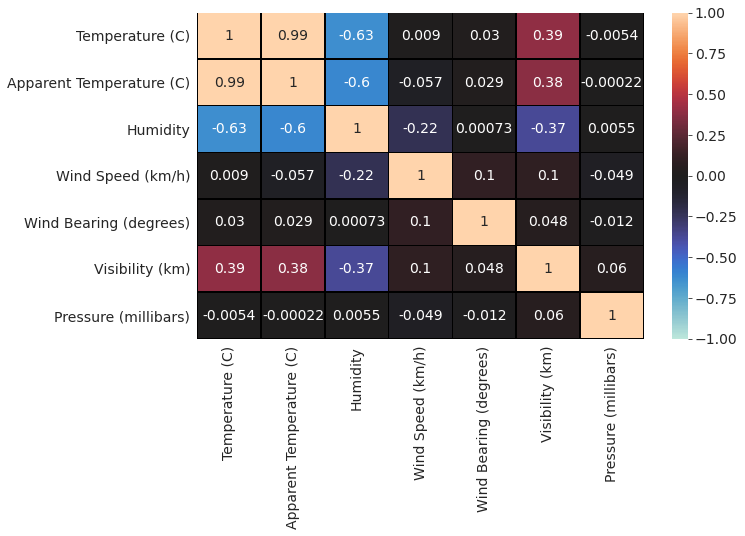

In [47]:
sns.heatmap(df_corr,vmin = -1,vmax=1,annot=True,linewidths=0.5,linecolor='black',center=0)

Temperature Variation

In [48]:
import plotly.graph_objects as go
#fig = go.Figure()
fig = go.Figure(layout_title_text="Weather Analysis")
fig.update_layout(
    xaxis_title="Timings (date: 31-03-2006)",
    yaxis_title="Temperature (C)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)

# Add traces
fig.add_trace(go.Scatter(x=some_dates["Time"], y=some_dates["Temperature (C)"],
                    mode='lines+markers',
                    name='lines+markers'))

In [49]:
other_dates = Time_vs_Temp.loc[Time_vs_Temp["Date"] == '2016-03-31']
fig = go.Figure(layout_title_text="Weather Analysis")
fig.update_layout(
    xaxis_title="Timings (date: 31-03-2016)",
    yaxis_title="Temperature (C)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#FF0000"
    )
)

# Add traces
fig.add_trace(go.Scatter(x=other_dates["Time"], y=other_dates["Temperature (C)"],
                    mode='lines+markers',
                    name='lines+markers'))

In [50]:
df.groupby('Precip Type')['Precip Type'].count()

Precip Type
rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [51]:
#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
df['Precip Type'] = df['Precip Type'].fillna("rain")

In [52]:
df.groupby('Precip Type')['Precip Type'].count()

Precip Type
rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [53]:
# hover_data={
#         'Start': '|%Y/%m/%d %H:%M:%S',
#         'Finish': '|%Y/%m/%d %H:%M:%S'
#     }

In [54]:
last["Date"].dtype

dtype('<M8[ns]')

In [55]:
fig = px.scatter(df, 
                 x='Temperature (C)', 
                 y='Humidity', 
                 color='precipitation_code', 
                 opacity=0.2,  
                 title='Temperature vs Humidity')
fig.update_traces(marker_size=5)
fig.show()

In [56]:
dates = Time_vs_Temp.loc[(Time_vs_Temp["Date"] == '2006-03-31') | (Time_vs_Temp["Date"] == '2016-03-31')|(Time_vs_Temp["Date"] == '2011-03-31')]


In [57]:
fig = px.line(dates, x="Time", y="Temperature (C)", color='Date')
fig.update_traces(mode="markers+lines", hovertemplate=None)
# fig.update_layout(hovermode="unified")
fig.show()

# **Training The Model**

In [58]:
df_cols = list(df.dtypes.index)

In [59]:
input_cols=df.select_dtypes(include=['float64']).dtypes.index

In [60]:
# target_cols=[]
# for cols in df_cols:
#   if cols not in input_cols:
#     if (cols != 'Date' and cols != 'Time'):
#       target_cols.append(cols)
# target_cols

In [61]:
inputs_df = df[['Humidity','Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)','Pressure (millibars)','precipitation_code']]
inputs_df.sample(5)

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),precipitation_code
29571,0.96,11.2700,20.0,3.0590,1002.90,2
33282,0.93,5.3613,201.0,5.3935,1020.53,2
83553,0.36,14.1519,169.0,16.1000,1019.38,2
47821,0.54,11.0768,242.0,11.2700,1007.09,2
38703,0.78,21.1393,148.0,11.1251,1002.54,2


In [62]:
targets_df = df[['Temperature (C)']]

In [63]:
df['Temperature (C)'].corr(df['precipitation_code'])


0.5626197278904665

In [64]:
df['Humidity'].corr(df['precipitation_code'])

-0.2321129600121325

Begin Here


In [66]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,Time,precipitation_code
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-03-31,22:00:00,2
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-03-31,23:00:00,2
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01,00:00:00,2
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01,01:00:00,2
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01,02:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,2016-09-09,17:00:00,2
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,2016-09-09,18:00:00,2
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,2016-09-09,19:00:00,2
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,2016-09-09,20:00:00,2


In [67]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [68]:
years =   df['Formatted Date'].dt.year


In [69]:
years.unique()

array([2006, 2005, 2010, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015,
       2016])

In [70]:
weather_df = df
train_df =  df[years < 2014]
val_df = df[years == 2014]
test_df = df[years > 2014]

In [71]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (70153, 14)
val_df.shape : (8757, 14)
test_df.shape : (17543, 14)


In [72]:
train_df.sample(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,Time,precipitation_code
57164,2012-06-15 18:00:00+00:00,Partly Cloudy,rain,23.144444,23.144444,0.50,4.6046,202.0,10.3523,1020.91,Partly cloudy in the morning.,2012-06-15,18:00:00,2
67705,2013-05-28 00:00:00+00:00,Mostly Cloudy,rain,11.511111,11.511111,0.96,2.0125,182.0,9.9820,1011.32,Mostly cloudy throughout the day.,2013-05-28,00:00:00,2
20473,2008-01-10 00:00:00+00:00,Foggy,snow,-2.211111,-4.722222,0.96,6.4239,56.0,0.4186,1028.15,Foggy until night.,2008-01-10,00:00:00,1


In [73]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary', 'Date', 'Time', 'precipitation_code'],
      dtype='object')

In [74]:
input_cols = ['Precip Type', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)','Summary','Daily Summary']
input_cols

['Precip Type',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)',
 'Summary',
 'Daily Summary']

In [75]:
target_cols  = 'Temperature (C)'

In [76]:
categorical_cols = ['Precip Type','Summary','Daily Summary']

In [77]:
numeric_cols=['Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

In [78]:
df[categorical_cols].nunique()


Precip Type        2
Summary           27
Daily Summary    214
dtype: int64

In [79]:
train_df[categorical_cols].nunique()

Precip Type        2
Summary           26
Daily Summary    185
dtype: int64

In [80]:
train_inputs  = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [81]:
val_inputs = val_df[input_cols].copy()
val_targets =val_df[target_cols].copy()

In [82]:
test_inputs =    test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

SCALING

In [83]:
numeric_cols=[ 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

In [84]:
train_inputs[numeric_cols].describe()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,70153.000000,70153.000000,70153.000000,70153.000000,70153.000000
mean,0.730259,10.871984,189.352173,10.042177,1003.477698
std,0.197572,7.010992,107.823409,3.918298,115.820217
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.590000,5.747700,116.000000,8.420300,1011.740000
50%,0.780000,9.982000,183.000000,9.982000,1016.430000
75%,0.890000,14.232400,290.000000,11.398800,1021.300000
max,1.000000,63.852600,359.000000,16.100000,1046.380000


In [85]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df[numeric_cols])
# train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
# val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
# test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Ctegorical encoding

In [87]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown= 'ignore')

In [88]:
encoder.fit(df[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [89]:
encoder.categories_

[array(['rain', 'snow'], dtype=object),
 array(['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
        'Breezy and Mostly Cloudy', 'Breezy and Overcast',
        'Breezy and Partly Cloudy', 'Clear',
        'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry',
        'Dry and Mostly Cloudy', 'Dry and Partly Cloudy', 'Foggy',
        'Humid and Mostly Cloudy', 'Humid and Overcast',
        'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
        'Overcast', 'Partly Cloudy', 'Rain', 'Windy', 'Windy and Dry',
        'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast',
        'Windy and Partly Cloudy'], dtype=object),
 array(['Breezy and foggy starting in the evening.',
        'Breezy and foggy until morning.',
        'Breezy and mostly cloudy overnight.',
        'Breezy and partly cloudy in the afternoon.',
        'Breezy in the morning and foggy in the evening.',
        'Breezy in the morning and mostly cloudy starting in the evening.',
        'Breezy

In [90]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Precip Type_rain', 'Precip Type_snow', 'Summary_Breezy', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy', 'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy', 'Summary_Dry and Partly Cloudy', 'Summary_Foggy', 'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast', 'Summary_Humid and Partly Cloudy', 'Summary_Light Rain', 'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy', 'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry', 'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy', 'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy', 'Daily Summary_Breezy and foggy starting in the evening.', 'Daily Summary_Breezy and foggy until morning.', 'Daily Summary_Breezy and mostly cloudy overnight.', 'Daily Summary_Breezy and partly cloudy in the afternoon.', 'Dail

In [91]:
train_inputs

,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary,Daily Summary
0,rain,0.793470,0.478635,0.591256,1.306976,0.101685,Partly Cloudy,Partly cloudy throughout the day.
1,rain,0.639996,0.499594,0.665756,1.306976,0.105960,Partly Cloudy,Partly cloudy throughout the day.
2,rain,0.793470,-0.995473,0.153570,1.099586,0.108610,Mostly Cloudy,Partly cloudy throughout the day.
3,rain,0.486521,0.476306,0.758881,1.306976,0.112628,Partly Cloudy,Partly cloudy throughout the day.
4,rain,0.486521,0.033841,0.665756,1.306976,0.113483,Mostly Cloudy,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...
70148,rain,0.793470,-0.049995,1.410754,-0.486564,0.133745,Mostly Cloudy,Mostly cloudy throughout the day.
70149,rain,0.742312,0.460005,1.410754,-1.031923,0.136823,Mostly Cloudy,Mostly cloudy throughout the day.
70150,rain,0.844629,-0.660131,1.578378,-0.828373,0.137678,Mostly Cloudy,Mostly cloudy throughout the day.
70151,rain,0.998104,-1.035062,1.531816,-0.644027,0.138874,Partly Cloudy,Mostly cloudy throughout the day.


In [92]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [93]:
pd.set_option('display.max_columns', None)

In [94]:
?pd.set_option

In [95]:
test_inputs.sample(1)

,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary,Daily Summary,Precip Type_rain,Precip Type_snow,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Daily Summary_Breezy and foggy starting in the evening.,Daily Summary_Breezy and foggy until morning.,Daily Summary_Breezy and mostly cloudy overnight.,Daily Summary_Breezy and partly cloudy in the afternoon.,Daily Summary_Breezy in the morning and foggy in the evening.,Daily Summary_Breezy in the morning and mostly cloudy starting in the evening.,Daily Summary_Breezy in the morning and mostly cloudy starting in the morning.,Daily Summary_Breezy in the morning and partly cloudy starting in the evening continuing until night.,Daily Summary_Breezy overnight and mostly cloudy throughout the day.,Daily Summary_Breezy overnight and overcast throughout the day.,Daily Summary_Breezy overnight and partly cloudy throughout the day.,Daily Summary_Breezy overnight and partly cloudy until evening.,Daily Summary_Breezy starting in the afternoon continuing until evening and foggy in the evening.,Daily Summary_Breezy starting in the afternoon continuing until evening and foggy starting in the evening.,Daily Summary_Breezy starting in the afternoon continuing until night and mostly cloudy starting in the evening.,Daily Summary_Breezy starting in the morning continuing until afternoon and mostly cloudy starting in the morning.,Daily Summary_Breezy starting in the morning continuing until afternoon and partly cloudy starting in the morning.,Daily Summary_Breezy starting in the morning continuing until night.,Daily Summary_Breezy starting overnight continuing until afternoon and foggy starting in the morning continuing until evening.,Daily Summary_Breezy starting overnight continuing until afternoon and mostly cloudy starting overnight continuing until evening.,Daily Summary_Breezy starting overnight continuing until morning and foggy in the evening.,Daily Summary_Breezy starting overnight continuing until morning and foggy overnight.,Daily Summary_Breezy starting overnight continuing until morning and partly cloudy starting in the morning.,Daily Summary_Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.,Daily Summary_Breezy starting overnight continuing until morning.,Daily Summary_Breezy until afternoon and mostly cloudy throughout the day.,Daily Summary_Breezy until afternoon and overcast throughout the day.,Daily Summary_Breezy until evening and foggy in the morning.,Daily Summary_Breezy until morning and mostly cloudy throughout the day.,Daily Summary_Clear throughout the day.,Daily Summary_Drizzle starting in the evening.,Daily Summary_Drizzle until morning.,Daily Summary_Foggy in the afternoon.,Daily Summary_Foggy in the evening.,Daily Summary_Foggy in the morning and breezy starting in the afternoon continuing until night.,Daily Summary_Foggy in the morning.,Daily Summary_Foggy overnight and breezy in the morning.,Daily Summary_Foggy overnight.,Daily Summary_Foggy starting in the afternoon and breezy starting in the afternoon continuing until evening.,Daily Summary_Foggy starting in the afternoon continuing until evening.,Daily Summary_Foggy starting in the afternoon continuing until night.,Daily Summary_Foggy starting in the afternoon.,Daily Summary_Foggy starting in the evening con

In [96]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ayshaasif14/weatherprediction


'https://jovian.ai/ayshaasif14/weatherprediction'

In [97]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (70153, 251)
train_targets: (70153,)
val_inputs: (8757, 251)
val_targets: (8757,)
test_inputs: (17543, 251)
test_targets: (17543,)


In [98]:
df[numeric_cols].describe()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.734899,10.810640,187.509232,10.347325,1003.235956
std,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,0.890000,14.135800,290.000000,14.812000,1021.090000
max,1.000000,63.852600,359.000000,16.100000,1046.380000


In [99]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (70153, 251)
train_targets: (70153,)
val_inputs: (8757, 251)
val_targets: (8757,)
test_inputs: (17543, 251)
test_targets: (17543,)


In [100]:
!pip install pyarrow --quiet

In [101]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [102]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 14.6 ms, sys: 5 ms, total: 19.6 ms
Wall time: 22.3 ms


In [103]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_cols]
val_targets = pd.read_parquet('val_targets.parquet')[target_cols]
test_targets = pd.read_parquet('test_targets.parquet')[target_cols]

CPU times: user 307 ms, sys: 218 ms, total: 524 ms
Wall time: 341 ms


# **Linear Regression**

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
model = LinearRegression().fit(train_inputs[numeric_cols + encoded_cols], train_targets)

In [106]:
predictions = model.predict(train_inputs[numeric_cols + encoded_cols])

In [107]:
from sklearn.metrics import mean_squared_error
loss = mean_squared_error(train_targets,predictions,squared=False)
loss

5.564847289571679

In [109]:
def comparepredictions(train_targets,predictions):
  i = 0
  for d, c in zip(train_targets, predictions):
      result =  (d, c)
      if(i%500 == 0):
          print(result)
      i = i+1

In [110]:
comparepredictions(train_targets,predictions)

(9.472222222222221, 11.715087890625)
(16.261111111111113, 14.574951171875)
(24.79444444444444, 16.067138671875)
(7.777777777777778, 8.318603515625)
(-2.061111111111112, -6.555419921875)
(2.866666666666665, 7.72265625)
(-0.11666666666666715, -6.418701171875)
(2.7333333333333343, 5.9755859375)
(31.038888888888888, 20.18115234375)
(21.25, 19.337158203125)
(13.922222222222226, 17.648193359375)
(0.6777777777777771, 14.51806640625)
(10.65, 11.471435546875)
(8.961111111111112, 13.63818359375)
(12.083333333333336, 9.902099609375)
(12.244444444444444, 22.09765625)
(11.138888888888886, 12.162109375)
(15.25, 11.10888671875)
(8.994444444444444, 11.8525390625)
(13.261111111111115, 21.165771484375)
(25.16666666666667, 19.082763671875)
(-5.077777777777778, -2.857666015625)
(6.138888888888888, 4.47119140625)
(0.8833333333333352, 7.2802734375)
(7.85, 14.209716796875)
(19.044444444444444, 21.376953125)
(24.83888888888889, 27.052978515625)
(27.194444444444446, 24.23388671875)
(7.805555555555554, 8.904052

# Create inputs and targets
inputs, targets = inputs_df,targets_df

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)


In [129]:
from sklearn.metrics import accuracy_score


In [112]:
model.score(train_inputs[numeric_cols + encoded_cols], train_targets)


0.6768616999124595

**class sklearn.linear_model.SGDRegressor(loss='squared_loss', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)[source]** 

In [113]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(loss= 'epsilon_insensitive',learning_rate='invscaling',
                     random_state=42, eta0=0.001,power_t=0.20,
                     alpha=0.001,shuffle = False).fit(train_inputs[numeric_cols + encoded_cols], train_targets)

In [114]:
predictions = model.predict(train_inputs[numeric_cols + encoded_cols])

In [115]:
model.score(train_inputs[numeric_cols + encoded_cols], train_targets)

0.6444092893274601

In [116]:
model.loss

'epsilon_insensitive'

# **Random Forest Regressor**

In [117]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor().fit(train_inputs[numeric_cols + encoded_cols], train_targets)

***Train set***

In [118]:
predictions = rfmodel.predict(train_inputs[numeric_cols + encoded_cols])

In [119]:
loss = mean_squared_error(train_targets,predictions)
loss

2.404430799283267

In [120]:
rfmodel.score(train_inputs[numeric_cols + encoded_cols], train_targets)

0.9749103723264854

In [121]:
comparepredictions(train_targets,predictions)

(9.472222222222221, 9.037555555555548)
(16.261111111111113, 15.539777777777786)
(24.79444444444444, 22.967499999999994)
(7.777777777777778, 6.465333333333335)
(-2.061111111111112, -2.2147777777777753)
(2.866666666666665, 4.337611111111114)
(-0.11666666666666715, -0.9530000000000018)
(2.7333333333333343, 2.7870000000000044)
(31.038888888888888, 28.098499999999966)
(21.25, 21.415444444444443)
(13.922222222222226, 13.122)
(0.6777777777777771, 3.095555555555559)
(10.65, 10.560055555555543)
(8.961111111111112, 11.05538888888889)
(12.083333333333336, 10.495555555555566)
(12.244444444444444, 14.46972222222223)
(11.138888888888886, 9.671444444444454)
(15.25, 14.009277777777779)
(8.994444444444444, 11.13672222222222)
(13.261111111111115, 16.993944444444455)
(25.16666666666667, 23.72822222222222)
(-5.077777777777778, -5.356222222222226)
(6.138888888888888, 6.259055555555565)
(0.8833333333333352, 2.151222222222221)
(7.85, 9.338555555555565)
(19.044444444444444, 19.251222222222236)
(24.83888888888

In [122]:
train_targets

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
70148    15.916667
70149    14.816667
70150    14.283333
70151    12.900000
73032     0.572222
Name: Temperature (C), Length: 70153, dtype: float64

In [123]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]


***Validation Set***

In [124]:
val_preds = rfmodel.predict(X_val)

In [125]:
val_loss = mean_squared_error(val_targets,val_preds)
val_loss

23.968442663034306

In [130]:
rfmodel.score(X_val,val_targets)

0.642168780171037

In [126]:
val_preds.shape

(8757,)

In [127]:
val_targets

70152     9.522222
70153     9.405556
70154     9.283333
70155     8.394444
70156     8.955556
           ...    
78905    19.222222
78906    17.294444
78907    16.688889
78908    16.766667
81789   -12.650000
Name: Temperature (C), Length: 8757, dtype: float64

***Test Set***

In [132]:
test_predictions = rfmodel.predict(X_test)

In [135]:
mean_squared_error(test_targets,test_predictions)

27.60765571553739

In [136]:
rfmodel.score(X_test,test_targets)

0.6738221206952755

In [128]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ayshaasif14/weatherprediction


'https://jovian.ai/ayshaasif14/weatherprediction'